# Programación en Julia:  Primeros pasos
## Gráficas

Héctor Medel

Benjamín Pérez

In [1]:
using Pkg
# Pkg.activate("/home/ben/Dropbox/Documents/Numericos/JuliaLinux/JuliaEnvironments/HP/cadi24")
Pkg.activate("/home/ben/Dropbox/Documents/Numericos/JuliaLinux/JuliaEnvironments/Dell/cadi24")

  Activating project at `~/Dropbox/Documents/Numericos/JuliaLinux/JuliaEnvironments/Dell/cadi24`


Existen varias opciones para elaborar gráficos en Julia

- Plots
- GR
- Plotly
- PythonPlot (matplotlib)
- UnicodePlots
- Makie

La documentación la podemos consultar en **https://docs.juliaplots.org/**

Plots es una interfaz de visualización que utiliza otros motores para graficar, como:  GR, PyPlot, Plotly, entre otros.  Por defecto utiliza GR.  Para utilizarla usaremos el comando **using Plots**

In [2]:
using Plots

Una vez cargado el paquete **Plots**, podemos elegir el motor que usaremos para graficar.  Lo anterior lo logramos ejecutando alguna de las siguientes opciones:  
- gr()
- pyplot()
- plotlyjs()

Nos interesa ahora visualizar la siguiente función

$f(x) = x^2$

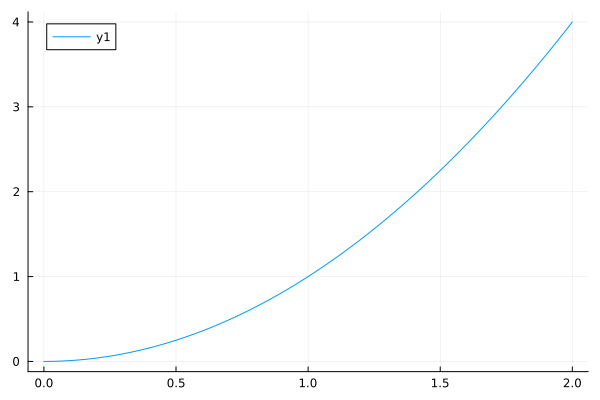

In [3]:
x = 0.0:0.01:2.0  # notemos que podemos hacer x = collect(0.0:0.01:2.0)
y = x.^2
plot(x,y)

## Atributos básicos de gráficas

Dependiendo del tipo de gráfica y el motor utilizado, existen atributos que podemos modificar, por ejemplo el color, estilo o grosor.

In [4]:
plotattr(:Series)

Defined Series attributes are:
arrow, bar_edges, bar_position, bar_width, bins, colorbar_entry, connections, contour_labels, contours, extra_kwargs, fill_z, fillalpha, fillcolor, fillrange, fillstyle, group, hover, label, levels, line_z, linealpha, linecolor, linestyle, linewidth, marker_z, markeralpha, markercolor, markershape, markersize, markerstrokealpha, markerstrokecolor, markerstrokestyle, markerstrokewidth, normalize, orientation, permute, primary, quiver, ribbon, series_annotations, seriesalpha, seriescolor, seriestype, show_empty_bins, smooth, stride, subplot, weights, x, xerror, y, yerror, z, z_order, zerror


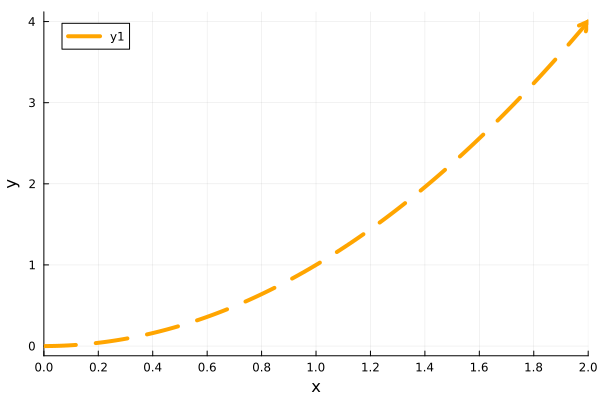

In [5]:
plot(x, y, 
	color=:orange,
	linewidth=4,
	linestyle=:dash,
	arrow=:arrow,
	xlabel="x",
	ylabel="y",
    xticks = 0:0.2:2,
	xlims = (0,2)
	)  # Entre otras propiedades!

## Varias gráficas en una misma figura

Para graficar varias funciones en una misma figura usaremos el símbolo **!** de la siguiente manera

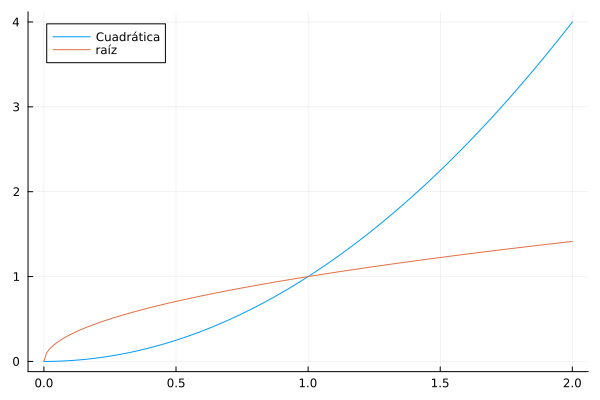

In [7]:
y2 = sqrt.(x);  # Recordemos que y sigue en memoria con la función cuadrática 
plot(x,y,
	label="Cuadrática");
plot!(x,y2,
	label="raíz")

In [8]:
x3 = -2:0.01:2
y3 = exp.(-x3.^2)
y4 = abs.(cos.(x3))

p = plot();
p = plot(x3,y3);
p = plot!(x3,y4);

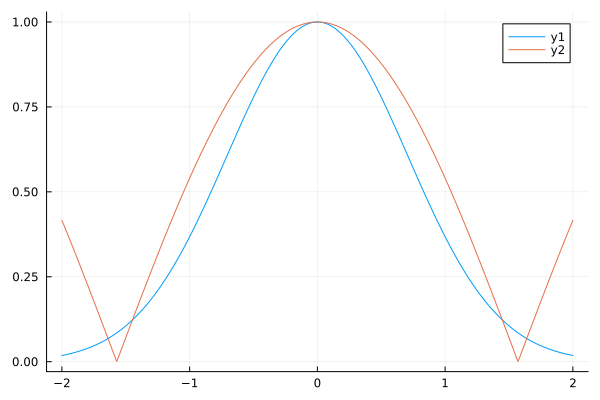

In [9]:
plot(p)

## Gráficas tipo scatter y subplots

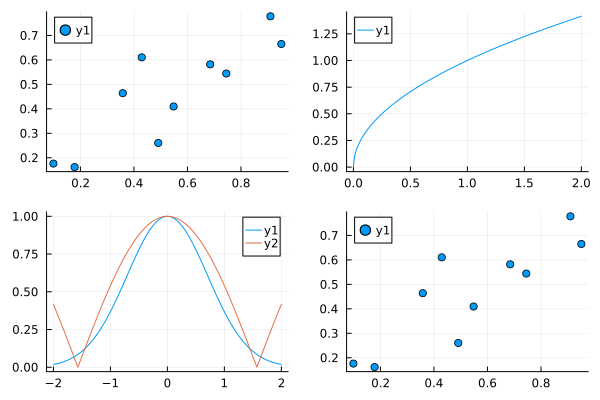

In [10]:
x5 = rand(10)
y5 = rand(10)
p1 = scatter(x5,y5); # Poner ;  para ocultar la grafica
p2 = plot(x,y2);

plot(p1,p2,p,p1)

## Visualización de funciones de 2 variables

Para funciones bivariadas, tenemos varias opciones de visualización.  Usemos como ejemplo la función

$g(x,y) = e^{-(x^2 + y^2)}$

In [135]:
# Size of numerical window
w0 = 1.0
xmax = 1.5*w0
ymax = 1.5*w0

xmin = -1.5*w0
ymin = -1.5*w0

pointsx = 32
pointsy = 32

# Generates ranges for xs and ys
xs = collect(range(xmin,length=pointsx,stop=xmax))
ys = collect(range(ymin,length=pointsy,stop=ymax))

# Generates matrices Matlab-style
mx, ny = length(xs), length(ys)
Xs = reshape(xs, 1, mx)
Ys = reshape(ys, ny, 1);

In [136]:
gg(x,y) = exp(-x^2 - y^2)  # Esto define la funcion de interes
GG = gg.(Xs,Ys);

In [137]:
@time G1 = [gg(x,y) for x in xs, y in ys];

  0.029401 seconds (27.33 k allocations: 1.873 MiB, 99.53% compilation time)


In [138]:
mesh = [(x,y) for y in ys, x in xs]
@time G2 = [gg(point...) for point in mesh];

  0.018437 seconds (22.14 k allocations: 1.471 MiB, 99.39% compilation time)


In [139]:
@time G3 = gg.(Xs, Ys);

  0.000018 seconds (2 allocations: 8.156 KiB)


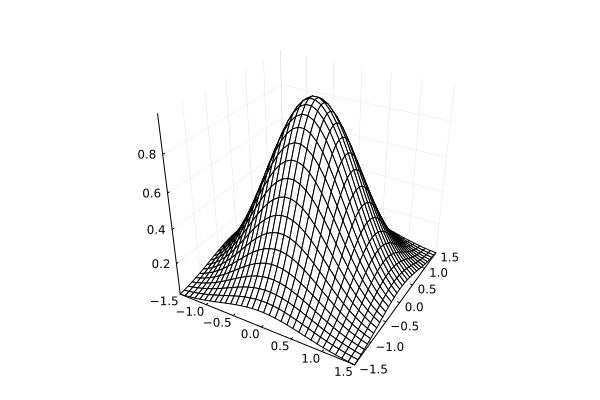

In [140]:
wireframe(xs, ys, GG, proj_type = :persp)  # Puede ser tambien surface()    proj_type = :persp u :ortho

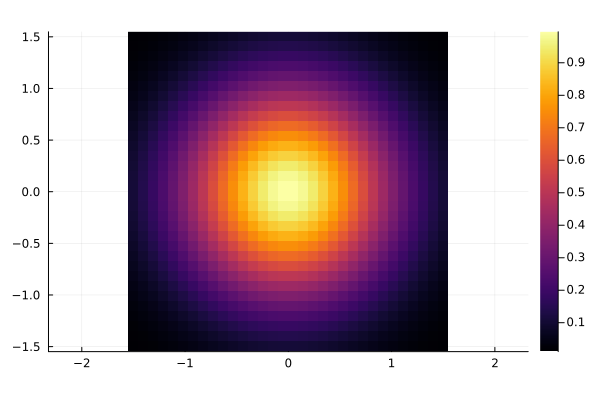

In [141]:

heatmap(xs, ys, GG, aspect_ratio=1)

Podemos también visualizar curvas sobre superficies

In [143]:
tt = -0.2:0.1:1.2
rx1 = tt
ry1 = -0.3tt .- 0.3
rz1 = gg.(rx1,ry1);

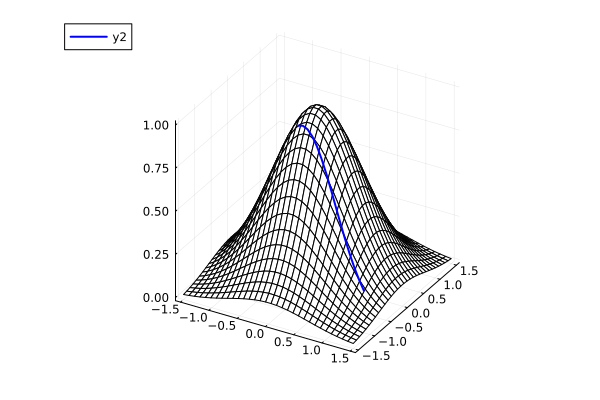

In [144]:
p7 = wireframe(xs, ys, GG)  # Puede ser tambien surface()
p7 = plot3d!(rx1, ry1, rz1, linewidth=2, color=:blue)

In [145]:
savefig(p7,"figura.png")

"/home/ben/Dropbox/Documents/Numericos/JuliaLinux/CADIs/PrimerosPasos/figura.png"

In [146]:
savefig(p7,"figura.pdf")

"/home/ben/Dropbox/Documents/Numericos/JuliaLinux/CADIs/PrimerosPasos/figura.pdf"

In [147]:
savefig(p7,"figura.svg")

"/home/ben/Dropbox/Documents/Numericos/JuliaLinux/CADIs/PrimerosPasos/figura.svg"

## Animaciones

┌ Info: Saved animation to /home/ben/Dropbox/Documents/Numericos/JuliaLinux/CADIs/PrimerosPasos/anim_fps15.gif
└ @ Plots /home/ben/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/home/ben/Dropbox/Documents/Numericos/JuliaLinux/CADIs/PrimerosPasos/anim_fps15.gif")
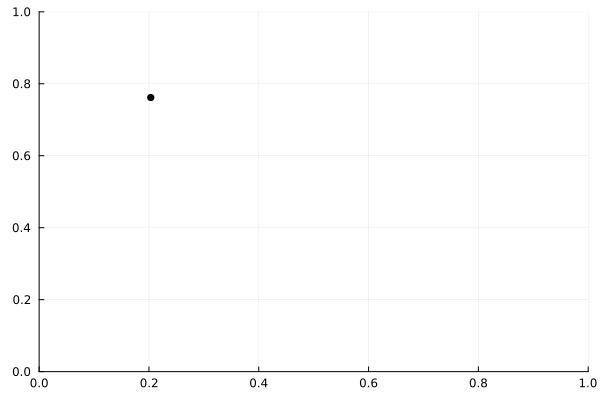

In [160]:
Nt = 50

pAnimacion=plot()
anim = @animate for ii = 1:Nt
    xr = rand()
    yr = rand()
    pAnimacion = scatter!([xr],[yr], xlims=(0,1), ylims=(0,1), color=:black, leg=false)
end

cps = 10
gif(anim, "anim_fps15.gif", fps = cps)